#**COVID19 Indonesia Visualization** <br>

**Connecting Google Colab to Drive** <br>
Pearly Tantra <br> <br>
*Note : as the interactive map doesn't show properly in Github, it is suggested to view it with NBViewer*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Installing Geopandas and the dependencies packages**

In [ ]:
pip install fiona

     |████████████████████████████████| 15.4 MB 38 kB/s 


In [ ]:
pip install pyproj

     |████████████████████████████████| 6.3 MB 5.1 MB/s 


In [ ]:
pip install shapely

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 


**Importing packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import geopandas as gpd

#**Importing Data Shp - Indonesian Map**<br>
data source : https://www.kaggle.com/imammuhajir/map-data/settings

In [ ]:
map_indo = gpd.read_file('/content/gdrive/My Drive/Data Visualization COVID19 Indonesia/INDONESIA_PROP.shp')
map_indo.head(5)

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


**Plotting Indonesia Map**

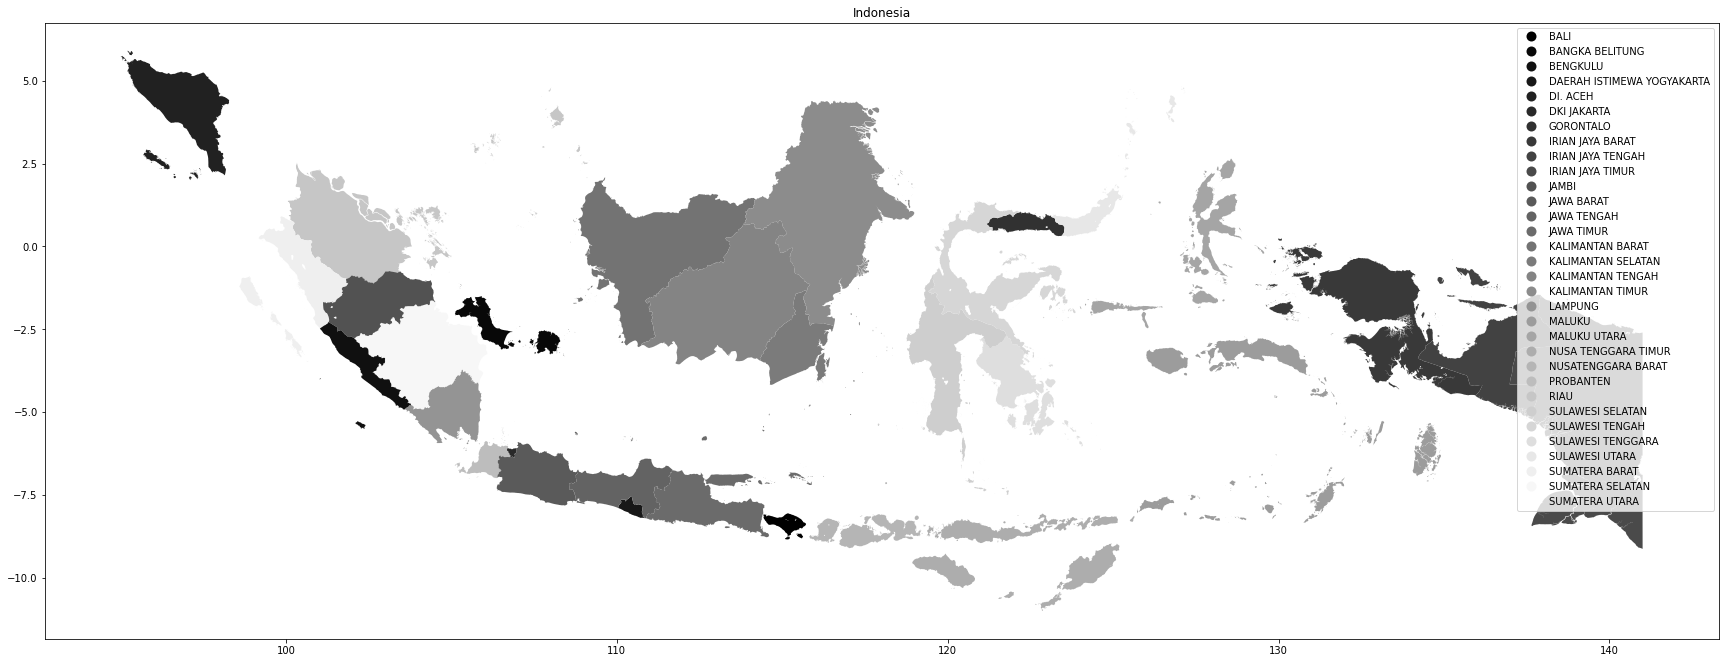

In [ ]:
map_indo.plot(column='Propinsi', cmap='gray', legend=True, figsize = (30,40))
plt.title('Indonesia')
plt.show()

# **Data Covid 19 Indonesia**<br>
data source : https://www.kaggle.com/hendratno/covid19-indonesia

**Importing Data Csv - Indonesian Covid Cases**

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Data Visualization COVID19 Indonesia/covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


**Filtering Columns Of Indonesia Covid data**<br>
For the columns : total cases, total deaths, total recovered, total active cases <br>
and filtered unnecessary columns

In [ ]:
filtered_data = ['Date','Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
covid_data = data[filtered_data]
covid_data = covid_data.apply(lambda x : x.astype(str).str.upper())
covid_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,1/8/2020,JAWA TIMUR,9,3,1,5,9,5,10,-6
1,1/9/2020,JAWA TIMUR,0,1,23,-24,9,6,33,-30
2,1/10/2020,JAWA TIMUR,0,1,14,-15,9,7,47,-45
3,1/11/2020,JAWA TIMUR,0,3,8,-11,9,10,55,-56
4,1/12/2020,JAWA TIMUR,0,3,1,-4,9,13,56,-60


**Checking the types of the value**


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                16283 non-null  object
 1   Location            16283 non-null  object
 2   New Cases           16283 non-null  object
 3   New Deaths          16283 non-null  object
 4   New Recovered       16283 non-null  object
 5   New Active Cases    16283 non-null  object
 6   Total Cases         16283 non-null  object
 7   Total Deaths        16283 non-null  object
 8   Total Recovered     16283 non-null  object
 9   Total Active Cases  16283 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


**Converting to the right types of values**

In [ ]:
numbercases = covid_data.loc[:,"New Cases":"Total Active Cases"].astype(int)
time = pd.DataFrame(covid_data.loc[:,'Date'].apply(pd.to_datetime))
location = pd.DataFrame(covid_data.loc[:,'Location'].astype(str))

**Reconstructing Covid Data**

In [ ]:
covid_data_final = pd.concat ([time.reset_index(drop=True), location.reset_index(drop=True), numbercases.reset_index(drop=True)],axis=1)
covid_data_final

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-01-08,JAWA TIMUR,9,3,1,5,9,5,10,-6
1,2020-01-09,JAWA TIMUR,0,1,23,-24,9,6,33,-30
2,2020-01-10,JAWA TIMUR,0,1,14,-15,9,7,47,-45
3,2020-01-11,JAWA TIMUR,0,3,8,-11,9,10,55,-56
4,2020-01-12,JAWA TIMUR,0,3,1,-4,9,13,56,-60
...,...,...,...,...,...,...,...,...,...,...
16278,2021-07-09,SULAWESI TENGGARA,124,1,3,120,12447,252,10412,1783
16279,2021-07-09,SULAWESI UTARA,278,9,9,260,17424,572,15525,1327
16280,2021-07-09,SUMATERA BARAT,718,10,275,433,55675,1259,48840,5576
16281,2021-07-09,SUMATERA SELATAN,341,6,221,114,31147,1569,27088,2490


**Rechecking the types of the value**

In [ ]:
covid_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16283 non-null  datetime64[ns]
 1   Location            16283 non-null  object        
 2   New Cases           16283 non-null  int64         
 3   New Deaths          16283 non-null  int64         
 4   New Recovered       16283 non-null  int64         
 5   New Active Cases    16283 non-null  int64         
 6   Total Cases         16283 non-null  int64         
 7   Total Deaths        16283 non-null  int64         
 8   Total Recovered     16283 non-null  int64         
 9   Total Active Cases  16283 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 1.2+ MB


**Checking Missing Value**

In [ ]:
covid_data_final.isna().sum()

Date                  0
Location              0
New Cases             0
New Deaths            0
New Recovered         0
New Active Cases      0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
dtype: int64

**Dropping Duplicate Data**

In [ ]:
covid_data_final.drop_duplicates(inplace=True)
covid_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16283 entries, 0 to 16282
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16283 non-null  datetime64[ns]
 1   Location            16283 non-null  object        
 2   New Cases           16283 non-null  int64         
 3   New Deaths          16283 non-null  int64         
 4   New Recovered       16283 non-null  int64         
 5   New Active Cases    16283 non-null  int64         
 6   Total Cases         16283 non-null  int64         
 7   Total Deaths        16283 non-null  int64         
 8   Total Recovered     16283 non-null  int64         
 9   Total Active Cases  16283 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 1.4+ MB


# **Generating Static Choropleth Maps** <br>
Choropleth map that I would like to generate here is a static map, where the colour in each provinces of Indonesia will differ the Total active cases of COVID-19. <br>
As I am not able to generate a time series cholopleth map in GeoPandas, I am taking latest date from the dataset which is July 9th, 2021. <br>

**Filtering covid_data_final for one date only : 7/9/2021** <br> 
The temporary dataset of July 9th 2021 (I will name it 'filtered_data') will be merged with the geometry (I named it map_indo) dataset basen on 'Location' and 'Propinsi' column.



In [ ]:
filtered_data = covid_data_final.loc[covid_data_final['Date']=='7/9/2021']
filtered_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
16249,2021-07-09,ACEH,80,13,108,-41,20140,862,15541,3737
16250,2021-07-09,BALI,674,6,0,668,54079,1618,46181,6280
16251,2021-07-09,BANTEN,514,4,49,461,61689,1457,50554,9678
16252,2021-07-09,BENGKULU,101,0,67,34,11671,194,9530,1947
16253,2021-07-09,DKI JAKARTA,13112,138,15022,-2048,636383,9270,527060,100053


**Merging filtered_data to map_indo**

In [ ]:
c_map = filtered_data.merge(map_indo, how='inner', left_on=['Location'], right_on=['Propinsi'])
c_map.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,ID,kode,Propinsi,SUMBER,geometry
0,2021-07-09,BALI,674,6,0,668,54079,1618,46181,6280,18,51,BALI,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((115.19494 -8.73232 0.00000, ..."
1,2021-07-09,BENGKULU,101,0,67,34,11671,194,9530,1947,31,17,BENGKULU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((103.46781 -4.35304 0.00000, ..."
2,2021-07-09,DKI JAKARTA,13112,138,15022,-2048,636383,9270,527060,100053,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
3,2021-07-09,DAERAH ISTIMEWA YOGYAKARTA,1665,44,902,719,72560,1892,54352,16316,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."
4,2021-07-09,JAMBI,186,2,118,66,13935,284,11892,1759,29,15,JAMBI,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((102.05732 -2.76197 0.00000, ..."


**Transforming the type of dataset into GeoDataFrame and plotting the Choropleth Map** <br>
As the map is shown below, the province that has the highest active cases is in Java island, as it shows the darkest colour in that region

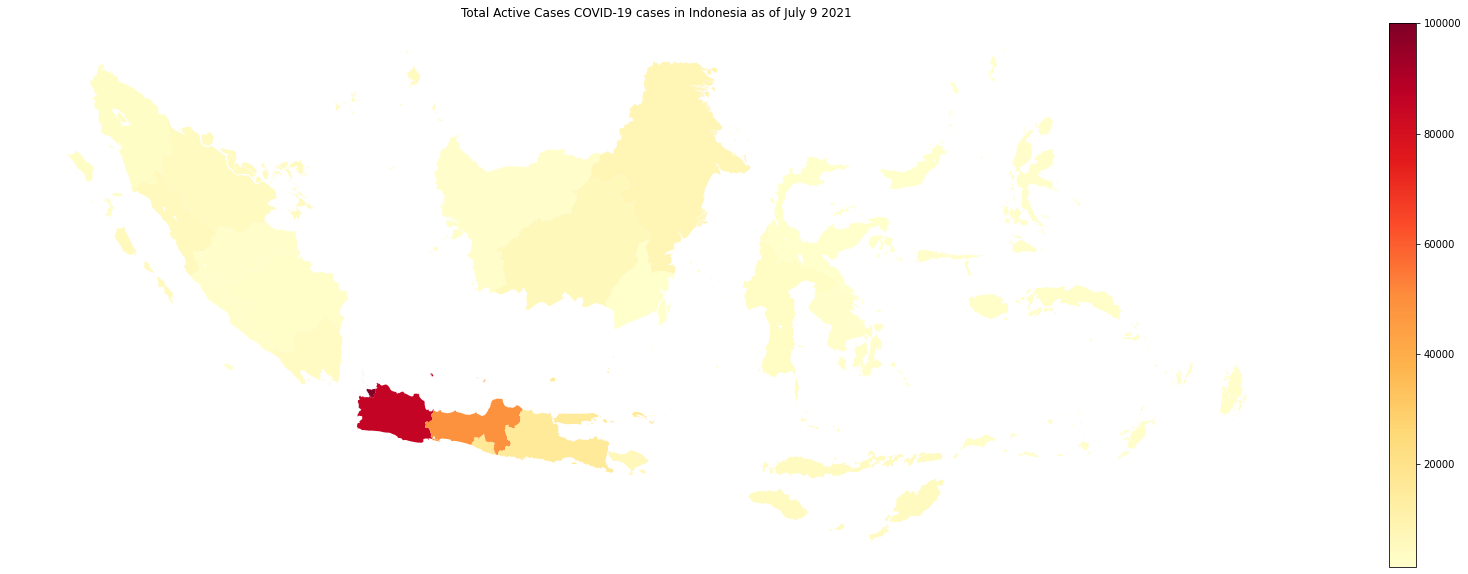

In [ ]:
from geopandas import GeoDataFrame
c_map = GeoDataFrame(c_map)

c_map.plot(column='Total Active Cases', cmap='YlOrRd', legend=True, figsize = (30,10))
plt.axis('off')
plt.title('Total Active Cases COVID-19 cases in Indonesia as of July 9 2021')
plt.show()

# **Generating Interactive Map**

Next, another visualization that is able to generate a more dynamic map. By using the Ipython widget, it will allow us to convert the dataset into interactive dashboards.


In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from datetime import datetime

In [ ]:
start_date = datetime(2020, 8, 1)
end_date = datetime(2021, 9, 7)

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

selection_range_slider

SelectionRangeSlider(description='Dates', index=(0, 402), layout=Layout(width='500px'), options=((' 01 Aug 202…

In [ ]:
merged_map = pd.DataFrame()
for i in covid_data_final.Date.unique():
    mergetemp = map_indo.merge(covid_data_final[covid_data_final.Date==i], left_on=['Propinsi'] ,right_on=['Location'],how='left')
    merged_map = merged_map.append(mergetemp)
def worldplot(date):
    merged_map[merged_map.Date==date[0]].plot(column='Total Cases',figsize=(30,10), cmap='YlOrRd', legend = True)

interact(worldplot,date=selection_range_slider)

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 402), layout=Layout(width='500px'), …

<function __main__.worldplot>

# **Statistic Visualization Indonesia Covid19**
**Plotting the highest 5 provinces with the highest active cases, recovered and deaths**

In [ ]:
top_five = filtered_data[filtered_data.Location !='INDONESIA'].sort_values(by=['Total Active Cases'], ascending=False)
top_five.head(5)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
16253,2021-07-09,DKI JAKARTA,13112,138,15022,-2048,636383,9270,527060,100053
16257,2021-07-09,JAWA BARAT,7399,160,4974,2265,440379,6008,348694,85677
16258,2021-07-09,JAWA TENGAH,4530,202,3042,1286,285348,12562,223706,49080
16254,2021-07-09,DAERAH ISTIMEWA YOGYAKARTA,1665,44,902,719,72560,1892,54352,16316
16259,2021-07-09,JAWA TIMUR,2530,168,1727,635,189705,13635,160296,15774


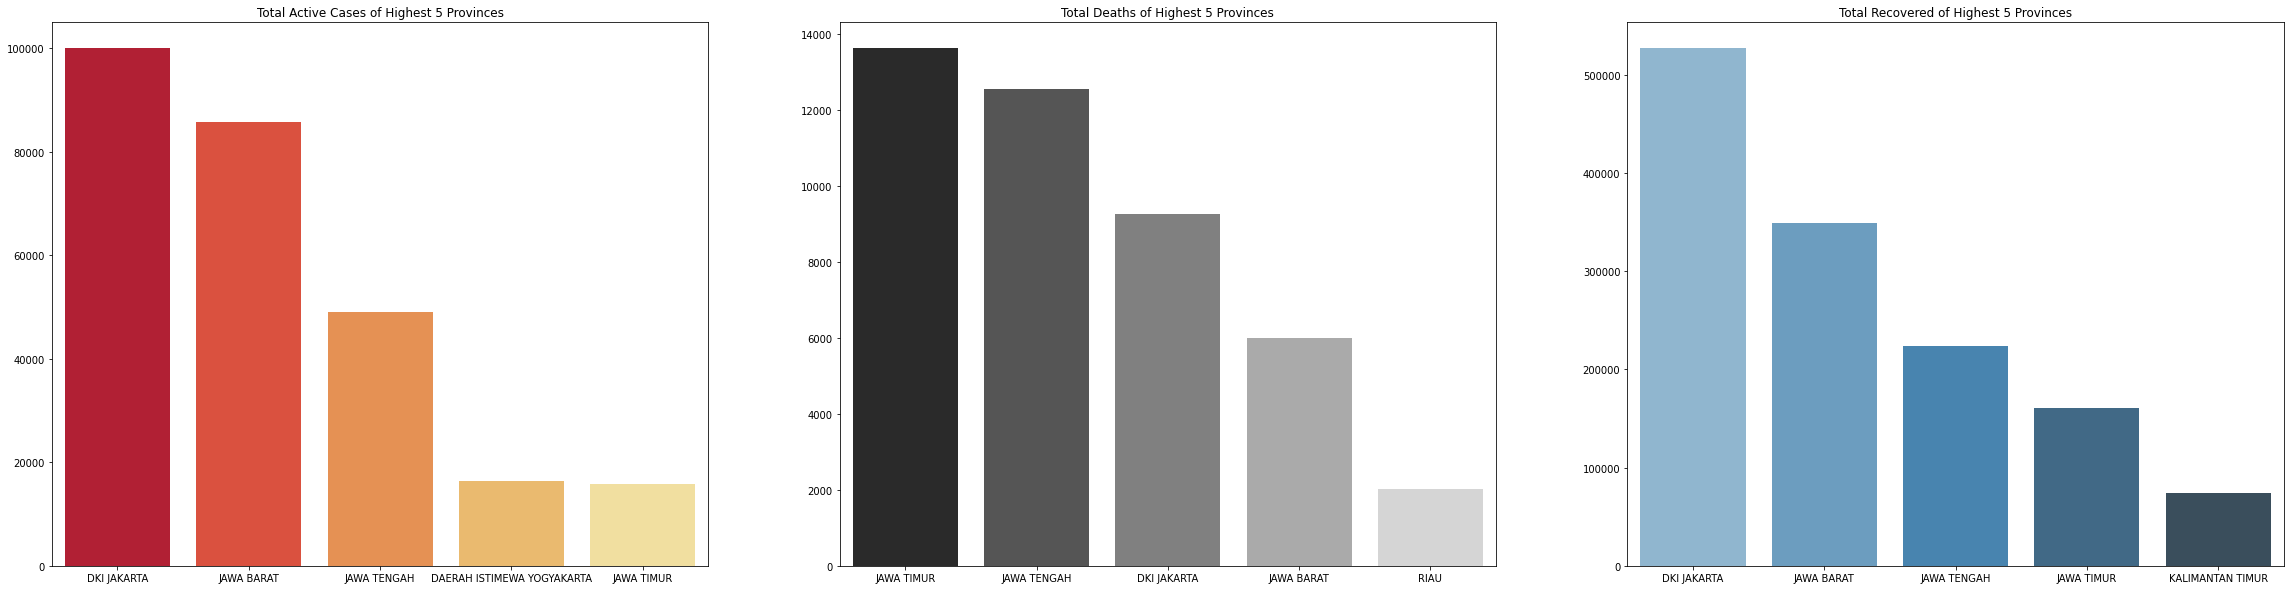

In [ ]:
x1 = top_five[top_five.Location != 'INDONESIA'].sort_values(by=['Total Active Cases'], ascending=False)['Location'].values[:5]
y1 = top_five[top_five.Location != 'INDONESIA'].sort_values(by=['Total Active Cases'], ascending=False)['Total Active Cases'].values[:5]
x2 = top_five[top_five.Location != 'INDONESIA'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5]
y2 = top_five[top_five.Location != 'INDONESIA'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5]
x3 = top_five[top_five.Location != 'INDONESIA'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5]
y3 = top_five[top_five.Location != 'INDONESIA'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5]

fig, ax = plt.subplots(1,3,figsize=(40,10))
sns.barplot(x=x1, y=y1, data=top_five,palette="YlOrRd_r",ax=ax[0]).set_title('Total Active Cases of Highest 5 Provinces')
sns.barplot(x=x2, y=y2, data=top_five,palette="gray",ax=ax[1]).set_title('Total Deaths of Highest 5 Provinces')
sns.barplot(x=x3, y=y3, data=top_five,palette="Blues_d",ax=ax[2]).set_title('Total Recovered of Highest 5 Provinces')
plt.show()

**Comparison of Cases, recovered, deaths**

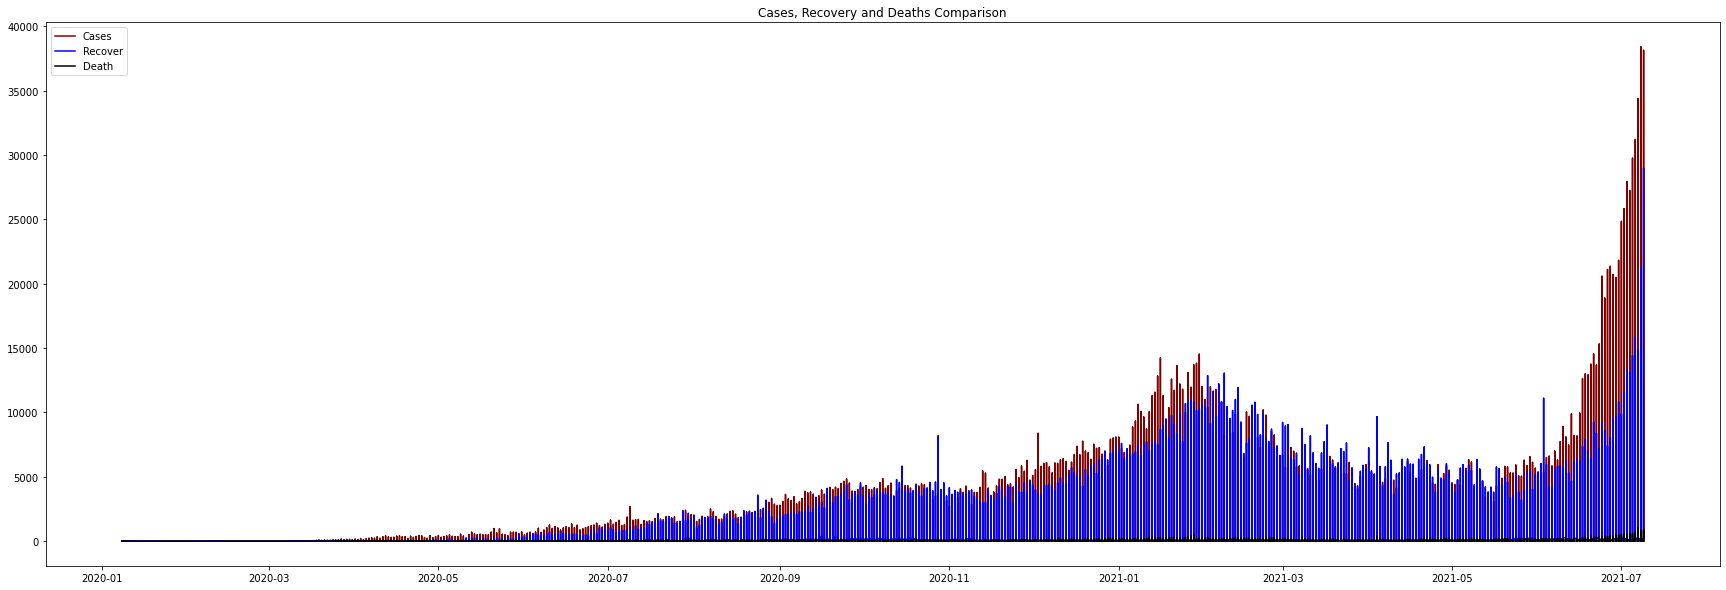

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(covid_data_final['Date'].values, covid_data_final['New Cases'].values, label='Cases',color='maroon')
plt.plot(covid_data_final['Date'].values, covid_data_final['New Recovered'].values, label = 'Recover',color='blue')
plt.plot(covid_data_final['Date'].values, covid_data_final['New Deaths'].values, label = 'Death',color='black')
plt.title('Cases, Recovery and Deaths Comparison')
plt.legend()
plt.show()

# **Correlation**

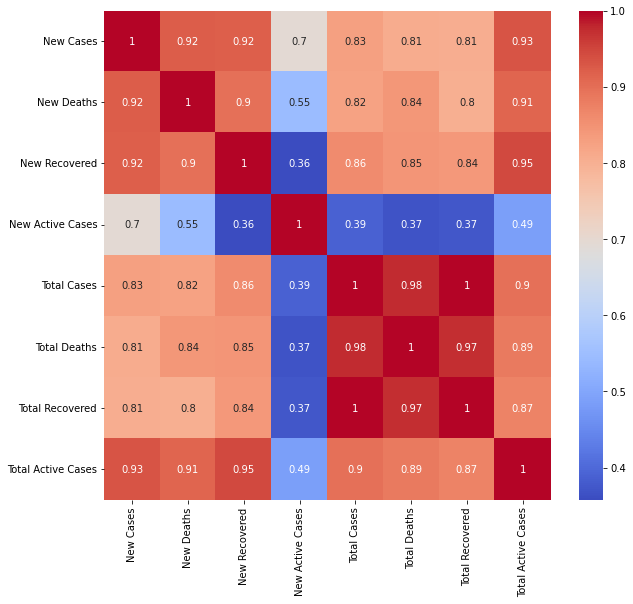

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(covid_data_final.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Visualization with Folium Map**
<br>
It is another interactive map for visualization 

In [ ]:
import folium
import branca

**Generating Indonesian Map**

In [ ]:
map_id = folium.Map(location=[-0.789275,113.921327], zoom_start = 5, max_zoom = 6 , min_zoom = 5, tiles = 'openstreetmap')
map_id

**Reconstructing Data for Folium Map**

In [ ]:
filter = ['Date','Location','Total Cases','Longitude','Latitude']
data_folium = data[filter]
data_folium = data_folium.apply(lambda x : x.astype(str).str.upper())

numbercases = data_folium.loc[:,"Total Cases":"Latitude"].astype(float)
time = pd.DataFrame(data_folium.loc[:,'Date'].apply(pd.to_datetime))
location = pd.DataFrame(data_folium.loc[:,'Location'].astype(str))

data_folium_1 = pd.concat ([time.reset_index(drop=True), location.reset_index(drop=True), numbercases.reset_index(drop=True)],axis=1)
data_folium_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         16283 non-null  datetime64[ns]
 1   Location     16283 non-null  object        
 2   Total Cases  16283 non-null  float64       
 3   Longitude    16283 non-null  float64       
 4   Latitude     16283 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 636.2+ KB


In [ ]:
# generating the latest date which is September 7 2021
data_folium_1 = data_folium_1.loc[data_folium_1['Date']=='7/9/2021']
indexnames = data_folium_1[data_folium_1['Location'] == 'INDONESIA'].index
data_folium_1.drop(indexnames, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_folium_1.reset_index()
data_folium_1.head()

,Date,Location,Total Cases,Longitude,Latitude
16249,2021-07-09,ACEH,20140.0,96.910522,4.225615
16250,2021-07-09,BALI,54079.0,115.131714,-8.369472
16251,2021-07-09,BANTEN,61689.0,106.109004,-6.456736
16252,2021-07-09,BENGKULU,11671.0,102.338421,-3.533584
16253,2021-07-09,DKI JAKARTA,636383.0,106.836118,-6.204699


**Adding the Location (Provinces) Marker on the Folium Map**

In [ ]:
for i in range (0,len(data_folium_1)):
  folium.Marker(
      location = [data_folium_1.iloc[i]['Latitude'],data_folium_1.iloc[i]['Longitude']],
      popup = data_folium_1.iloc[i]['Location'] #& data_folium_1.iloc[i]['Total Cases']
  ).add_to(map_id)

In [ ]:
map_id

**Custom Marker : Adding the Location with the number of total cases**

In [ ]:
for i in range (0, len(data_folium_1)):
  html = f'''
  {data_folium_1.iloc[i]['Location']}<br>
  {data_folium_1.iloc[i]['Total Cases']}
  '''
  iframe = folium.IFrame(html=html, width = 100, height = 100)
  popup = folium.Popup(iframe, max_width = 100)
  folium.Marker(
      location = [data_folium_1.iloc[i]['Latitude'],data_folium_1.iloc[i]['Longitude']],
      popup = popup
  ).add_to(map_id)

In [ ]:
map_id



---


*References* :<br>

*https://medium.com/analytics-vidhya/spatial-visualization-and-network-analysis-with-geo-pandas-python-60bfc48396c8*<br>
*https://in.springboard.com/blog/time-series-analysis-interactive-time-series-maps-for-covid-19-spread/*<br>
*https://medium.com/analytics-vidhya/generate-a-static-choropleth-india-map-using-corona-virus-pandemic-data-19e9cbf5a07d*<br>
*https://geopandas.readthedocs.io/en/latest/docs/user_guide/mergingdata.html*<br>
*https://wellsr.com/python/seaborn-barplot-tutorial-for-python/*
*https://www.kaggle.com/dabaker/fancy-folium*
*https://www.python-graph-gallery.com/312-add-markers-on-folium-map*
*https://stackoverflow.com/questions/62228489/python-folium-how-to-create-a-folium-map-marker-with-multiple-popup-text-line*